<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Cidade_VENICE_Lucas_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Venice Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade VENICE situada na região de Veneto - Itália , e ver quais insights podem ser extraídos a partir de dados brutos.**


**Autor: LUCAS DE MELO E ALVIM DA SILVA**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/italy/veneto/venice/2021-11-04/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

Para melhor entedimento de todos foi feito um dicionario com todas as possiveis possiveis informações que poderão ajduar na melhor compreensão do texto.


* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias 




Antes de iniciar será verificado as 5 primeiras linhas do **DATASET** para melhor visualizar a distribuição dos dados.

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,available_year_%
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,3,163,2019-06-26,1.52,3,364,1,NaN,99.726027
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,213,4,64,2016-07-17,0.66,3,357,0,NaN,97.808219
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,4,186,2021-10-20,1.52,3,351,2,NaN,96.164384
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,193,1,412,2021-10-16,3.29,2,201,2,NaN,55.068493
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,2,81,2021-08-24,1.42,1,289,9,NaN,79.178082


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O arquico CSV retirado do site da airbnb é uma versão resumida dos dados coletados pela propria empresa, onde é disponibilizado no site ([*Airbnb*](http://insideairbnb.com/get-the-data.html)). O arquivo em execução possui 7370 Entradas(Linhas) e 18 Variaveis(Colunas/Series).

Antes do incio da analise dos dados devemos analisar se existe algum dado outliner no DATASET, dados outliner são aqueles que tem uma diferença discrepante dos outros dados do DATASET
* Durante o processo observamos que o valor do preço('price') era um outliner já que seu valor maximo (9999) é muito diferento do seu valor de 75% (145)


In [ ]:
# identificar o volume de dados do DataFrame
print(' DATASET AIRBNB - CIDADE VENICE ')
print(f'     Entrada: {df.shape[0]}    ')
print(f'     Variáveis: {df.shape[1]}  ')

# verificar as 5 primeiras entradas do dataset
df.head()

 DATASET AIRBNB - CIDADE VENICE 
     Entrada: 7370    
     Variáveis: 18  


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,3,163,2019-06-26,1.52,3,364,1,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,213,4,64,2016-07-17,0.66,3,357,0,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,4,186,2021-10-20,1.52,3,351,2,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,193,1,412,2021-10-16,3.29,2,201,2,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,2,81,2021-08-24,1.42,1,289,9,NaN


In [ ]:
#Utilizando a função Describe para analise do DataSet
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.370000e+03,7.370000e+03,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,6429.000000,7370.000000,7370.000000,7370.000000
mean,2.574112e+07,1.096562e+08,45.444376,12.320997,138.226323,2.458345,63.365129,1.694592,10.413840,217.012890,7.358480
std,1.578385e+07,1.171311e+08,0.023370,0.039068,265.954523,8.497872,91.785263,1.714124,22.540107,132.458323,12.506136
min,6.623000e+03,1.501600e+04,45.274390,12.173216,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.271823e+07,1.265229e+07,45.434213,12.323552,71.000000,1.000000,4.000000,0.450000,1.000000,89.000000,0.000000
50%,2.484466e+07,5.897951e+07,45.438080,12.331470,100.000000,2.000000,24.000000,1.200000,3.000000,267.000000,2.000000
75%,3.947916e+07,1.797234e+08,45.444120,12.340012,145.000000,3.000000,86.000000,2.400000,7.000000,338.000000,10.000000
max,5.314402e+07,4.285418e+08,45.537350,12.421370,9999.000000,400.000000,765.000000,27.500000,132.000000,365.000000,387.000000


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

O tratamento dos dados ausentes é de suma importância em qualquer analise de dados.A retirada desses dados servirá para melhor avaliação e automatização do DATASET, mas a sua apariação também pode mostrar falhas no sistema ou no input dos dados. 

* A variavel 'licence' possui 6147 entradas com valores ausentes, sendo esta representado 84,1% de todas as sua entradas não preenchidas. Com esse dado é exposto que 84,1% dos comodos não possui nenhum tipo de licença de funcionamento.

* Já as variaveis 'reviews_per_month' e 'last_review' possuem 941 valores ausentes, sendo este representando que 12,77% das pessoas que visitam algum lugar na região não da nenhum feedback via app.


In [ ]:

# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_null = df.isnull().sum()
df_test = df_null.values > 0
df_null1 = df_null.sort_values(ascending= False)
print(df_null1)

license                           6197
reviews_per_month                  941
last_review                        941
host_name                           17
longitude                            0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
room_type                            0
number_of_reviews_ltm                0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
id                                   0
dtype: int64


In [ ]:
df_null_porcent = (df_null1/df.shape[0])*100
print(f'''A porcentagem de valores ausentes em relação a quantidade de linhas:
 {df_null_porcent}''')

A porcentagem de valores ausentes em relação a quantidade de linhas:
 license                           84.084125
reviews_per_month                 12.767978
last_review                       12.767978
host_name                          0.230665
longitude                          0.000000
name                               0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64


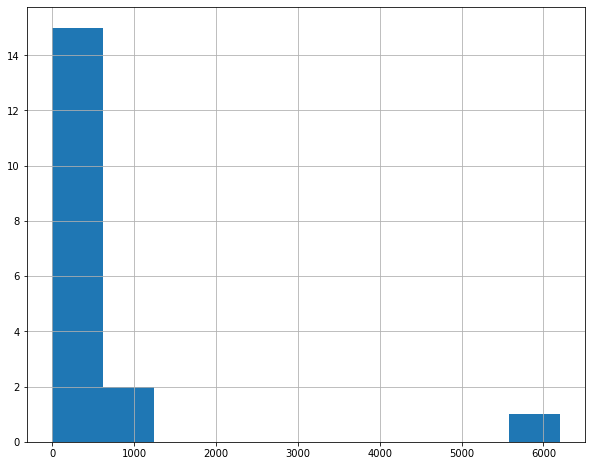

In [ ]:
df_null1.hist(figsize=(10,8))

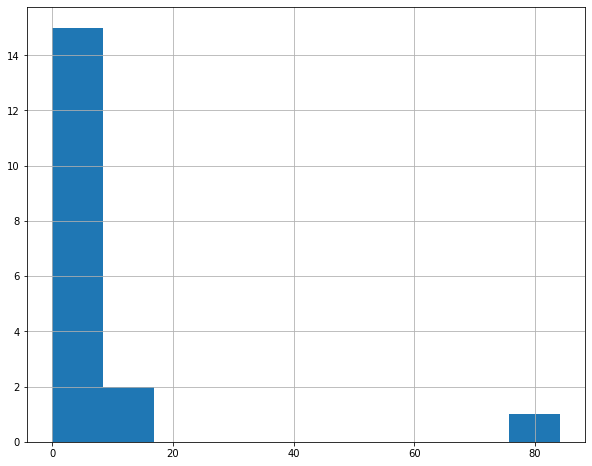

In [ ]:
df_null_porcent.hist(figsize=(10,8))

Utilizando o comando 'Duplicate' com o comando 'Value_Counts' podemos chegar a conclusão que não temos nenhum valor duplicado no DataSet.

In [ ]:
df.duplicated().value_counts()


False    7370
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

É de suma importância conhecer todos os tipos(types) das variaveis, para que possamos ter ciência de como nossas entradas irão se comportar e como podemos fazer para manipula-las.

A utilização de graficos, facilita a visualização dos dados da tabela, a visualiazação torna a leitura dele mais simples(para muitas pessoas), fazendo com que se tira conclusões que se apenas olhassemos os dados na tabela não seria possivel.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7370 non-null   int64  
 1   name                            7370 non-null   object 
 2   host_id                         7370 non-null   int64  
 3   host_name                       7353 non-null   object 
 4   neighbourhood_group             7370 non-null   object 
 5   neighbourhood                   7370 non-null   object 
 6   latitude                        7370 non-null   float64
 7   longitude                       7370 non-null   float64
 8   room_type                       7370 non-null   object 
 9   price                           7370 non-null   int64  
 10  minimum_nights                  7370 non-null   int64  
 11  number_of_reviews               7370 non-null   int64  
 12  last_review                     64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b79f68d0>,
      dtype=object)

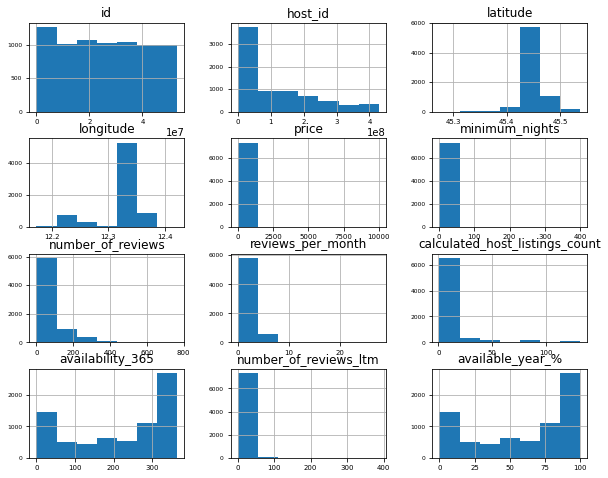

In [ ]:

# plotar o histograma das variáveis numéricas
df.hist(xlabelsize=7,ylabelsize=6,bins=7,figsize=(10,8))


  Fazendo a analise dos graficos foi possivel verificar que alguns valores estavam bem diferentes dos demais e para conseguirmos verificar com maior exatidão, utiliza-se o comando describe() para sabermos alguns argumentos

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.370000e+03,7.370000e+03,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,6429.000000,7370.000000,7370.000000,7370.000000
mean,2.574112e+07,1.096562e+08,45.444376,12.320997,138.226323,2.458345,63.365129,1.694592,10.413840,217.012890,7.358480
std,1.578385e+07,1.171311e+08,0.023370,0.039068,265.954523,8.497872,91.785263,1.714124,22.540107,132.458323,12.506136
min,6.623000e+03,1.501600e+04,45.274390,12.173216,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.271823e+07,1.265229e+07,45.434213,12.323552,71.000000,1.000000,4.000000,0.450000,1.000000,89.000000,0.000000
50%,2.484466e+07,5.897951e+07,45.438080,12.331470,100.000000,2.000000,24.000000,1.200000,3.000000,267.000000,2.000000
75%,3.947916e+07,1.797234e+08,45.444120,12.340012,145.000000,3.000000,86.000000,2.400000,7.000000,338.000000,10.000000
max,5.314402e+07,4.285418e+08,45.537350,12.421370,9999.000000,400.000000,765.000000,27.500000,132.000000,365.000000,387.000000


Foi verificado que as variaveis ('price',	'minimum_nights') tem seus valores maximos bem acima que os valores de 75% dos dados, confirmando que alguns dados estavam inseridos de maneira errada.

> Determinado o valor do maximo para determinar o outlier
* IQR = 75%(VALUE) - 25%(VALUE)
* MAX_VALUE = (75%(VALUE) + IQR*1,5)
* IQR = 145 - 71 = 74
* MAX_VALUE = 145 + 74*1,5 = 256

> Valores acima de 256 serão considerados "outlier"

> Deve ser retirado também os valores iguais a 0, pois esses representam os locais que já fecharam.


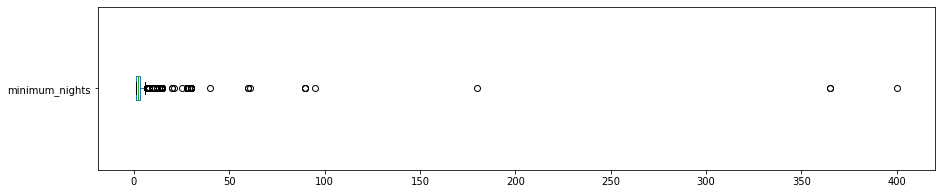

minimum_nights: valores acima de 6:
158 entradas
0 entradas
2.1438%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 6 dias para minimum_nights
print(f"minimum_nights: valores acima de 6:")
print(f"{(len(df[df.minimum_nights > 6]))} entradas")
print(f"{(len(df[df.minimum_nights == 0]))} entradas")
print(f"{(len(df[df.minimum_nights > 6]) / df.shape[0])*100:.4f}%")

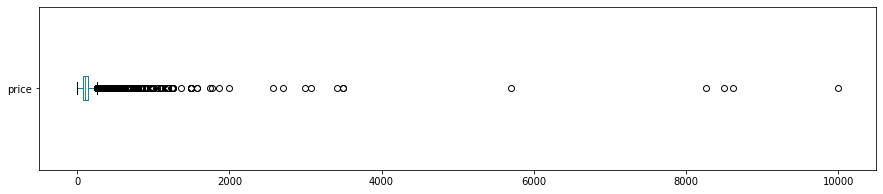


price: valores acima de 256 e iguais a 0
519 entradas para maiores de 256
3 entradas para iguais a 0
522 para entradas maiores de 256 e iguais a 0
7.08%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 256 para price
print("\nprice: valores acima de 256 e iguais a 0")
print(f"{len(df[df.price > 256])} entradas para maiores de 256")
print(f"{len(df[df.price == 0])} entradas para iguais a 0")
value_dis=(len(df[df.price > 256]) + (len(df[df.price == 0])))
print(f'{value_dis} para entradas maiores de 256 e iguais a 0')
print (f"{(value_dis/df.shape[0])*100:.2f}%")

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 256 ].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0 ].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b60bb750>,
      dtype=object)

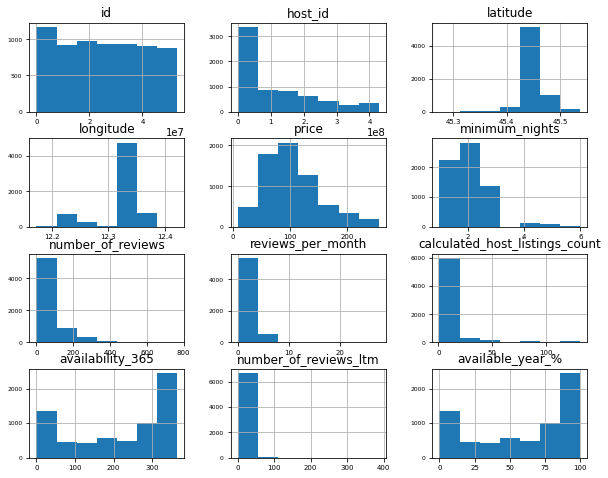

In [ ]:
df_clean.hist(xlabelsize=7,ylabelsize=6,bins=7,figsize=(10,8))

Conseguimos verificar que os valores estão mais compativeis com a realidade. 
> Podemos verificar que as variaveis que envolvem reviews ainda estão com valores discrepantes, mas como essas variaveis envolve diretamente o feedback dos hospedes, não podemos verificar se os valores são validos ou invalidos.

### **Q4. Qual a média dos preços de aluguel?**

A média de preço das acomodações na região da Venice é de $ 104,9 

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

104.79803395889186

### **Q4. Qual a correlação existente entre as variáveis**

A correlação é uma associação estatística comumente referida como o grau pelo qual um par de variáveis estão linearmente relacionadas, se a correlação de duas variaveis for positiva significa que quando uma cresce a outra cresce junto, já se for negativa uma só irá cresce caso a outra desça.

* No DATASET podemos levar desconsiderar muitas correlações, mads ainda conseguimos criar um grafico de calor que deixa exposto que os dados a maioria dos dados correalacionados são de correlação positiva, sendo assim uam necessita do crescimento do outro MESMO QUE COM POUCA INTENSIDADE.

In [ ]:
import matplotlib.pyplot as plt

# criar uma matriz de correlação
df_clean.corr()

# mostrar a matriz de correlação

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,available_year_%
id,1.000000,0.594553,0.061394,-0.079772,-0.005434,-0.233190,-0.507833,0.097664,0.097601,0.017996,0.015015,0.017996
host_id,0.594553,1.000000,0.097907,-0.119111,-0.081853,-0.185073,-0.292618,0.045184,-0.120721,-0.025183,0.010884,-0.025183
latitude,0.061394,0.097907,1.000000,-0.773417,-0.375734,-0.223598,0.020490,0.048734,-0.057743,-0.000614,-0.014087,-0.000614
longitude,-0.079772,-0.119111,-0.773417,1.000000,0.358276,0.213546,-0.012240,-0.052916,0.045113,0.039539,0.021780,0.039539
price,-0.005434,-0.081853,-0.375734,0.358276,1.000000,0.178031,-0.175542,-0.195191,0.187168,0.100599,-0.167564,0.100599
minimum_nights,-0.233190,-0.185073,-0.223598,0.213546,0.178031,1.000000,0.007655,-0.143271,-0.070031,-0.046029,-0.087062,-0.046029
number_of_reviews,-0.507833,-0.292618,0.020490,-0.012240,-0.175542,0.007655,1.000000,0.623693,-0.155351,0.004009,0.473386,0.004009
reviews_per_month,0.097664,0.045184,0.048734,-0.052916,-0.195191,-0.143271,0.623693,1.000000,-0.124443,0.030335,0.694097,0.030335
calculated_host_listings_count,0.097601,-0.120721,-0.057743,0.045113,0.187168,-0.070031,-0.155351,-0.124443,1.000000,0.116152,-0.082009,0.116152
availability_365,0.017996,-0.025183,-0.000614,0.039539,0.100599,-0.046029,0.004009,0.030335,0.116152,1.000000,0.084971,1.000000


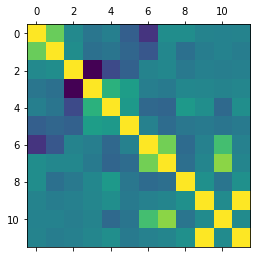

In [ ]:
# plotar um heatmap a partir das correlações
plt.matshow(df_clean.corr())

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Na cidade de Venice possui uma vasta gama de tipos de imoveis que podem ser alugados por temporada, mas de todos os imoveis a modalidade 'Entire home/apt' se destaca uma quantidade de 5677 imoveis disponveis para aluguel, sendo este 77,02% dos immoveis disponiveis.






In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    5101
Private room       1399
Hotel room          189
Shared room          25
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df.shape[0]

Entire home/apt    0.692130
Private room       0.189824
Hotel room         0.025645
Shared room        0.003392
Name: room_type, dtype: float64

A disponibilidade do imovel ao longo do ano é algo muito crucial quando está fazendo o levantamento dos dadosse ,podemos analisar na tabela que dos 5 imoveis mais disponiveis ao longo do ano, 3 são do tipo 'Entire home/apt'.


In [ ]:
#Criando uma serie para relacionar a quantidade de dias vagos com a quantidade de dias do ano.(Lucas)

df_clean['available_year_%'] = df.availability_365/365*100


In [ ]:
#mostrar probabilidade do quarto ter disponiblidade ao longo do ano. (Lucas)

df_clean.loc[:,['name','room_type','available_year_%']]

,name,room_type,available_year_%
0,Venice Blue on Canal apartment,Entire home/apt,99.726027
1,Venice garden charme and canal view!,Entire home/apt,97.808219
2,Venice home to relax and emotions,Entire home/apt,96.164384
3,Junior Suite with balcony overlooking canal,Private room,55.068493
5,Ca' Barba B&B: room n102 (jacuzzi shower),Hotel room,94.520548
...,...,...,...
7365,Hotel al Sotoportego - Camera 1,Private room,67.945205
7366,S. MARCO APARTMENTS - DOUBLE ROOM 8,Private room,98.082192
7367,S. MARCO APARTMENTS - DOUBLE ROOM 9,Private room,98.082192
7368,Venice Mestre Entire Apartment,Entire home/apt,99.726027


### **Q6. Qual a localidade mais cara do dataset?**



Os preços variam de acordo com a localização de cada imovel, em média os bairros mais carros tem um valor de 200 DOLARES e os bairros mais baratos 30 DOLARES, sendo está uma cidade que engloba qualquer tipo de turista.



In [ ]:
# ver preços por bairros, na média
neigh_mean = df_clean.price.groupby(df.neighbourhood).mean()
print(neigh_mean.sort_values(ascending = False))

neighbourhood
Isola San Giorgio              200.000000
Alberoni                       193.193548
Torcello                       140.000000
San Marco                      130.906448
Case Dosa                      125.000000
San Polo                       121.374510
Burano                         120.500000
Dorsoduro                      120.130346
Santa Croce                    115.992218
Lido                           109.653285
Castello                       108.705836
Cannaregio                     105.501853
Giudecca                       103.643478
Malamocco                      102.384615
Murano                          98.756757
San Pietro in Volta             97.500000
Pellestrina                     97.000000
Mazzorbo                        95.000000
Sant'Elena                      94.956522
Tessera                         93.037037
Altobello                       85.566667
Tronchetto                      84.000000
Ca' Sabbioni                    78.333333
Marghera Zona Indust

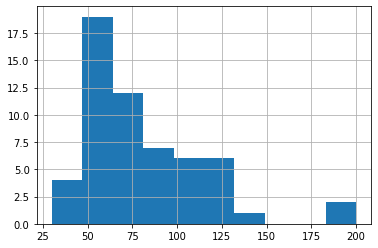

In [ ]:
#Histograma para saber a quantidade de acomodações por preço
df_clean.price.groupby(df.neighbourhood).mean().hist()

Pelo mapa de calor, pode-se notar que se tem uma grande leva de imoveis na região do centro da cidade.

                                                   longitude  latitude
name                                                                  
! exceptional location ! Near the cruise terminal   12.31905  45.43860
!!!COMPLETELY NEW- 6PAX-15 MIN.FROM VCE!!           12.22728  45.49201
" Alloggio Casa Loredan 1"                          12.32543  45.43588
" Casa Zanchi - 2 "                                 12.32438  45.43653
"Alle Rondini 2"- Country House                     12.21644  45.53480
...                                                      ...       ...
🌻 Dreamy Garden Harmony House - Cannaregio 🌻        12.32090  45.44533
🌼 Charming House with Courtyard - Cannaregio 🌼      12.32241  45.44410
🍁En suite double room VillaVispaVenezia SouthWing   12.22965  45.47475
💎 Luxury Apartment - Doge's Residence 💎             12.33083  45.44356
🦢 San Marco Square Cinnamon Scent Ambience 🦢        12.33749  45.43638

[6621 rows x 2 columns]


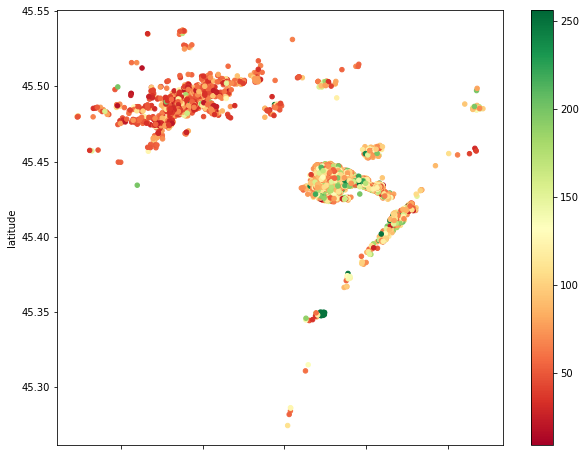

In [ ]:
# plotar os imóveis pela latitude-longitude
id_lar = df_clean.groupby([df.name])[['longitude','latitude']]
print(id_lar.first())

df_clean.plot.scatter(y='latitude',x='longitude',figsize=(10,8), c=df_clean.price, cmap = 'RdYlGn')

Foi verificado os hosts que mais receberam guests ao longo do ano

In [ ]:
# Verificando o host que mais recebeu pessoas.

df_clean.host_name.value_counts(ascending= False)


Andrea             133
City Apartments    109
Marco               97
Pleuwy              91
Stefano             91
                  ... 
Paula                1
Martine              1
Ilia                 1
Luca Pietro          1
Ugolini              1
Name: host_name, Length: 1232, dtype: int64

Sabemos que o valor do aluguel tem uma grande influência na hora da escolha, mas podemos verificar que não é somente isso pois o Host mais barato (Dani) não se encontra nem entre os 5 hosts que mais receeberam.

In [ ]:
#Verificando o host com o imovel mais caro

host_mean = df_clean.price.groupby(df.host_name).mean()
print(host_mean.sort_values(ascending = False))

host_name
Moreno       254.000000
Yourflat     250.000000
Pafin Srl    250.000000
Hanna        250.000000
Philippe     250.000000
                ...    
Bottle        21.000000
Nhat          18.000000
Viorica       18.000000
Xiaoyang      18.000000
Dani           9.333333
Name: price, Length: 1232, dtype: float64


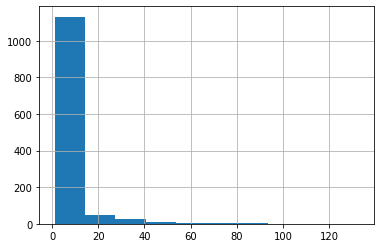

In [ ]:
df_clean.host_name.value_counts().hist()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do minimo de noites passadas na cidade é de 1,97 ~= 2 noites.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

1.9711051534107835

## Conclusões




*  Essa Análise de Dados se deu devido a uma atividade feita pelo curso Ciencia de Dados 3.0 ministrado pelo professor Carlos Melo.

* Como falado anteriomente, esse DataSet é uma versão resumida do DataSet oferecido pela Airbnb, e possui poucas Series em relação a versão extendida.

* Esse foi a minha primeira Analise de Dados feita, e com certeza tem alguns pontos que podem ser corrigidos, rumos diferentes que posso tomar, e estou aberto a novas ideias e correções. 


ISSO É APENAS O COMEÇO




